In [59]:
# Core Libraries
import numpy as np  # Numerical computations
import pandas as pd  # Data manipulation and analysis

# Data Vizualiation
import matplotlib.pyplot as plt  # Plotting and visualization
import seaborn as sns  # Statistical data visualization

# Machine Learning and Evaluation
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift, estimate_bandwidth

import warnings
warnings.filterwarnings("ignore")

In [5]:
#load data
df = pd.read_csv(r"C:\Users\User\Desktop\10Alytics\Machine Learning\Customers Segmentation.csv")
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.shape

(200, 5)

In [9]:
# Get summary of dataset
print(df.describe())

       CustomerID         Age  Annual_Income_(k$)  Spending_Score
count  200.000000  200.000000          200.000000      200.000000
mean   100.500000   38.850000           60.560000       50.200000
std     57.879185   13.969007           26.264721       25.823522
min      1.000000   18.000000           15.000000        1.000000
25%     50.750000   28.750000           41.500000       34.750000
50%    100.500000   36.000000           61.500000       50.000000
75%    150.250000   49.000000           78.000000       73.000000
max    200.000000   70.000000          137.000000       99.000000


In [11]:
# Check for missing values
print("Missing values:", df.isnull().sum())

Missing values: CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


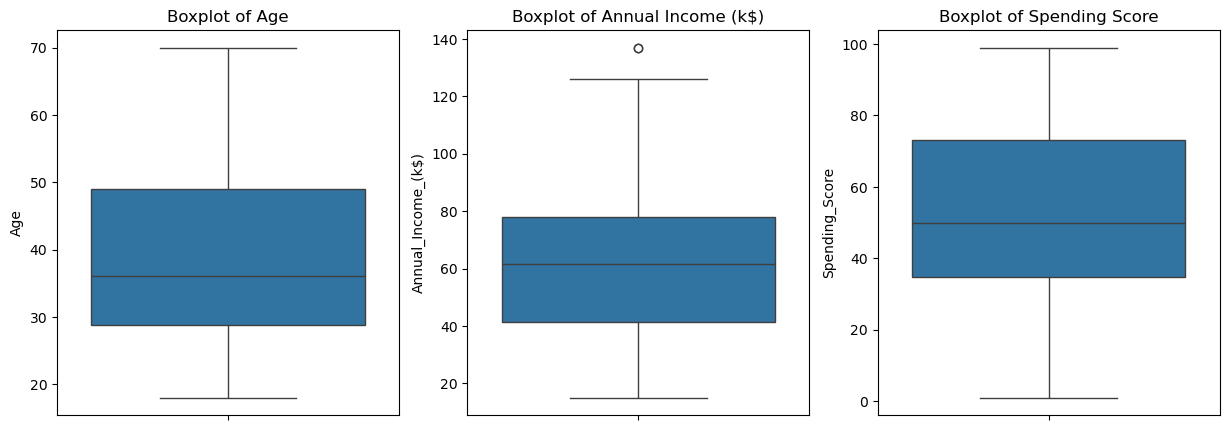

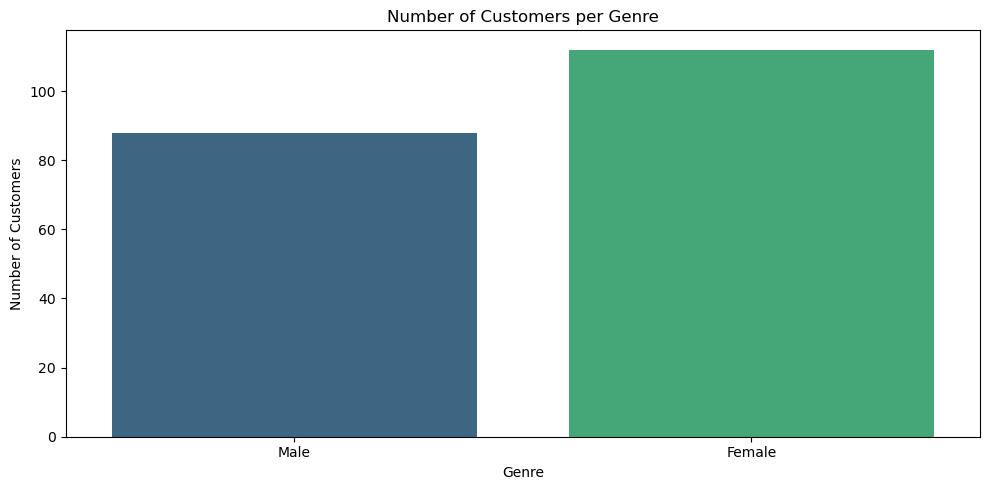

In [19]:
# Create DataFrame
df1 = pd.DataFrame(df)

# Plotting the boxplots
plt.figure(figsize=(15, 5))

# Boxplot for Age
plt.subplot(1, 3, 1)
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age')

# Boxplot for Annual Income
plt.subplot(1, 3, 2)
sns.boxplot(y=df['Annual_Income_(k$)'])
plt.title('Boxplot of Annual Income (k$)')

# Boxplot for Spending Score
plt.subplot(1, 3, 3)
sns.boxplot(y=df['Spending_Score'])
plt.title('Boxplot of Spending Score')

# Plotting the bar plot for number of customers per genre
plt.figure(figsize=(10, 5))
sns.countplot(x='Genre', data=df, palette='viridis')
plt.title('Number of Customers per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

In [25]:
# Encoding the 'Genre' column in the existing DataFrame 'df'
label_encoder = LabelEncoder()
df['Genre'] = label_encoder.fit_transform(df['Genre'])

# Output the transformed DataFrame
print(df.head())

   CustomerID  Genre  Age  Annual_Income_(k$)  Spending_Score
0           1      1   19                  15              39
1           2      1   21                  15              81
2           3      0   20                  16               6
3           4      0   23                  16              77
4           5      0   31                  17              40


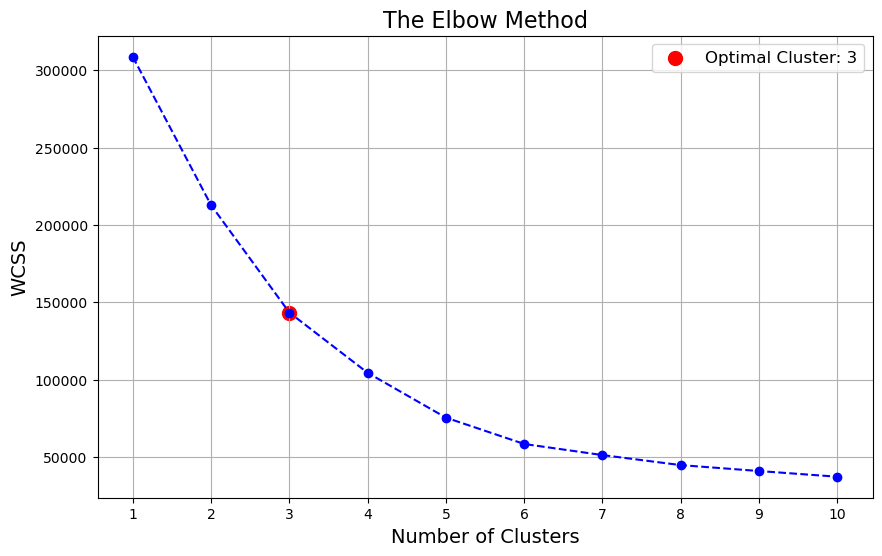

In [65]:
# Prepare data for clustering (using Age, Annual_Income_(k$), and Spending_Score)
X = df[['Age', 'Annual_Income_(k$)', 'Spending_Score']]

# Calculate WCSS for different cluster numbers
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue')
plt.title('The Elbow Method', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
plt.xticks(range(1, 11))
plt.grid(True)

# Highlight the optimal cluster (e.g., 3 for demonstration)
optimal_k = 3  # Replace with the actual optimal cluster based on the graph
plt.scatter(optimal_k, wcss[optimal_k - 1], color='red', label=f'Optimal Cluster: {optimal_k}', s=100)
plt.legend(fontsize=12)

plt.show()

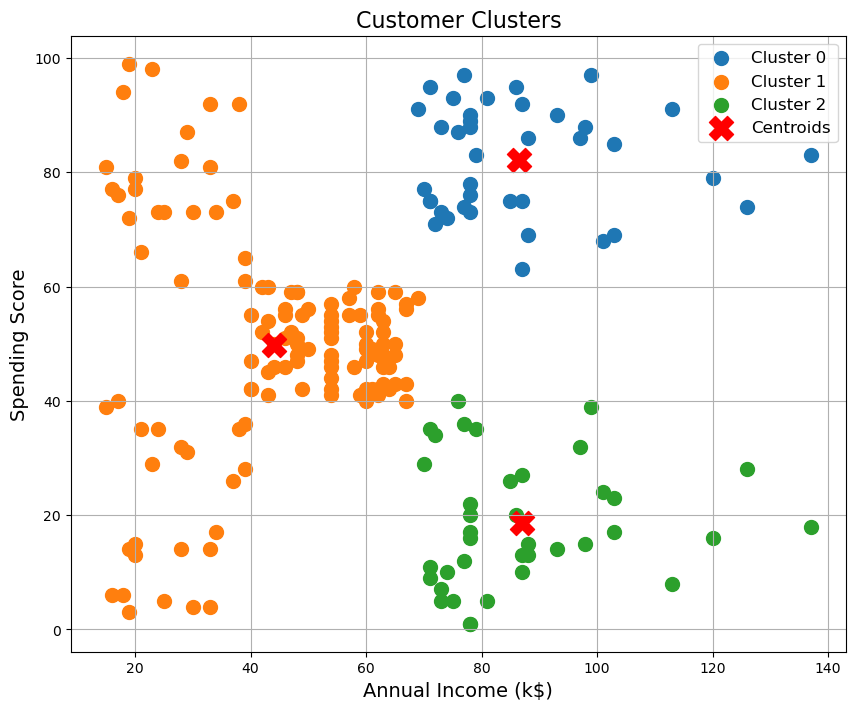

In [67]:
# Prepare the data
X = df[['Age', 'Annual_Income_(k$)', 'Spending_Score']]

# Perform K-Means clustering
optimal_k = 3  # Replace this with the optimal number of clusters from the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters (scatter plot for 2D projection)
plt.figure(figsize=(10, 8))

for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual_Income_(k$)'], 
                cluster_data['Spending_Score'], 
                label=f'Cluster {cluster}', 
                s=100)

# Add cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 1], centroids[:, 2], 
            s=300, c='red', label='Centroids', marker='X')

# Add plot details
plt.title('Customer Clusters', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [61]:
# Using MeanShift
# Prepare the data
X = df[['Age', 'Annual_Income_(k$)', 'Spending_Score']]

# Estimate bandwidth for MeanShift
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=100)

# Perform MeanShift clustering
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift.fit(X)

# Get the labels and the number of clusters
labels = meanshift.labels_
n_clusters = len(np.unique(labels))

# Assign clusters to the DataFrame
df['Cluster'] = labels

# Display the number of clusters
print(f'Number of clusters found: {n_clusters}')

Number of clusters found: 3
